In [3]:
import pandas as pd
import seaborn as sns
from sklearn import linear_model

In [4]:
df=pd.read_csv("Concrete_Data.csv")

In [5]:
df.head()

,Cement,Blast_Furnace_Slag,Fly_Ash,Water,Superplasticizer,Coarse_Aggregate,Fine_Aggregate,Age_in_days,Concrete_compressive_strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [6]:
X = df.drop("Concrete_compressive_strength", axis = 1)
y = df["Concrete_compressive_strength"]

In [7]:
df.dtypes


Cement                           float64
Blast_Furnace_Slag               float64
Fly_Ash                          float64
Water                            float64
Superplasticizer                 float64
Coarse_Aggregate                 float64
Fine_Aggregate                   float64
Age_in_days                        int64
Concrete_compressive_strength    float64
dtype: object

In [8]:
from sklearn.feature_selection import mutual_info_regression

In [9]:
def generate_mi_scores(X, y, discrete_features):
    mi_score = mutual_info_regression(X, y, discrete_features = discrete_features)
    mi_score = pd.Series(mi_score, name = "mi_scores", index = X.columns)
    mi_score = mi_score.sort_values(ascending=False)
    return mi_score

In [10]:
mi_scores = generate_mi_scores(X, y, discrete_features = "auto")

In [11]:
mi_scores

Water                 0.360551
Age_in_days           0.357468
Cement                0.305399
Coarse_Aggregate      0.254829
Superplasticizer      0.213030
Fine_Aggregate        0.209232
Blast_Furnace_Slag    0.181430
Fly_Ash               0.119517
Name: mi_scores, dtype: float64

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

In [13]:
sns.set_style("whitegrid")


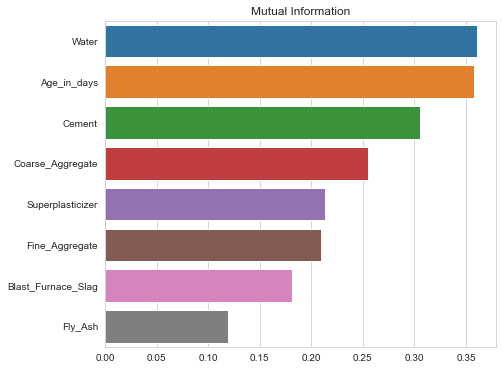

In [14]:
plt.figure(figsize=(7, 6))
sns.barplot(x=mi_scores.values, y=mi_scores.index)
plt.title("Mutual Information")
plt.show()

LINEAR EGRESSION


In [15]:
from sklearn.model_selection import train_test_split

In [16]:
X_train, X_test,  y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=42)

In [17]:
X_train.head()

,Cement,Blast_Furnace_Slag,Fly_Ash,Water,Superplasticizer,Coarse_Aggregate,Fine_Aggregate,Age_in_days
196,194.7,0.0,100.5,165.6,7.5,1006.4,905.9,28
631,325.0,0.0,0.0,184.0,0.0,1063.0,783.0,7
81,318.8,212.5,0.0,155.7,14.3,852.1,880.4,3
526,359.0,19.0,141.0,154.0,10.9,942.0,801.0,3
830,162.0,190.0,148.0,179.0,19.0,838.0,741.0,28


In [18]:
y_train.head()

196    25.72
631    17.54
81     25.20
526    23.64
830    33.76
Name: Concrete_compressive_strength, dtype: float64

In [19]:
from sklearn.linear_model import LinearRegression

In [20]:
LinReg=LinearRegression()

In [21]:
LinReg.fit(X_train,y_train)

LinearRegression()

In [22]:
LinReg.score(X_train,y_train)

0.6196723710532998

In [23]:
LinReg.score(X_test,y_test)

0.5943782479239202

In [24]:
from sklearn.metrics import classification_report

In [25]:
predictions=LinReg.predict(X_test)

In [26]:
print(classification_report(y_test,predictions))

ValueError: continuous is not supported

BINARIZATION

In [29]:
from sklearn.preprocessing import Binarizer 

In [30]:
bin=Binarizer(threshold=50)

In [31]:
col=df["Concrete_compressive_strength"].values
col=col.reshape(-1,1)

In [32]:
bin.fit_transform(col)

array([[1.],
       [1.],
       [0.],
       ...,
       [0.],
       [0.],
       [0.]])

In [33]:
df["Concrete_compressive_strength"]=bin.fit_transform(col)

In [34]:
df

,Cement,Blast_Furnace_Slag,Fly_Ash,Water,Superplasticizer,Coarse_Aggregate,Fine_Aggregate,Age_in_days,Concrete_compressive_strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,1.0
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,1.0
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,0.0
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,0.0
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,0.0
...,...,...,...,...,...,...,...,...,...
1025,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28,0.0
1026,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28,0.0
1027,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28,0.0
1028,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28,0.0


In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=42)

In [36]:
y_train.head()

196    0.0
631    0.0
81     0.0
526    0.0
830    0.0
Name: Concrete_compressive_strength, dtype: float64

In [37]:
from sklearn.linear_model import LogisticRegression

In [38]:
LogReg=LogisticRegression()

In [39]:
LogReg.fit(X_train,y_train)

LogisticRegression()

In [40]:
LogReg.score(X_train,y_train)

0.8571428571428571

In [41]:
LogReg.score(X_test,y_test)

0.8187702265372169

In [42]:
from sklearn.metrics import confusion_matrix,classification_report

In [43]:
predictions=LogReg.predict(X_test)

In [44]:
cm = confusion_matrix(y_test, predictions)

In [45]:
cm

array([[226,  23],
       [ 33,  27]], dtype=int64)

Text(0.5, 16.0, 'prediction')

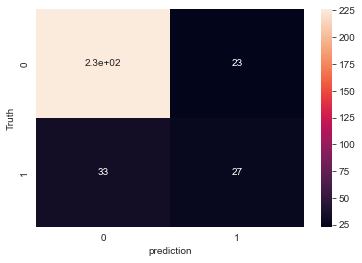

In [46]:
sns.heatmap(cm, annot=True)
plt.ylabel("Truth")
plt.xlabel("prediction")

In [47]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

         0.0       0.87      0.91      0.89       249
         1.0       0.54      0.45      0.49        60

    accuracy                           0.82       309
   macro avg       0.71      0.68      0.69       309
weighted avg       0.81      0.82      0.81       309



CREATING SYNTHETIC FEATURES

In [48]:
X = df.drop("Concrete_compressive_strength", axis=1)
y = df["Concrete_compressive_strength"]
X["TotalAgg"]=X["Fine_Aggregate"] + X["Coarse_Aggregate"]
X["FCRatio"] = X["Fine_Aggregate"] / X["Coarse_Aggregate"]
X["AggCmtRatio"] = (X["Coarse_Aggregate"] + X["Fine_Aggregate"]) / X["Cement"]
X["WtrCmtRatio"] = X["Water"] / X["Cement"]

In [49]:
X

,Cement,Blast_Furnace_Slag,Fly_Ash,Water,Superplasticizer,Coarse_Aggregate,Fine_Aggregate,Age_in_days,TotalAgg,FCRatio,AggCmtRatio,WtrCmtRatio
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,1716.0,0.650000,3.177778,0.300000
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,1731.0,0.640758,3.205556,0.300000
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,1526.0,0.637339,4.589474,0.685714
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,1526.0,0.637339,4.589474,0.685714
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,1803.9,0.843724,9.083082,0.966767
...,...,...,...,...,...,...,...,...,...,...,...,...
1025,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28,1638.4,0.883002,5.927641,0.649783
1026,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28,1631.3,0.994498,5.063004,0.608318
1027,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28,1672.4,0.874048,11.261953,1.297643
1028,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28,1778.5,0.797191,11.178504,1.103708


In [50]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=42 )

In [51]:
LogReg=LogisticRegression()

In [52]:
LogReg.fit(X_train,y_train)

C:\Users\PC\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [53]:
LogReg.score(X_train,y_train)

0.855755894590846

In [54]:
LogReg.score(X_test,y_test)

0.8220064724919094

In [55]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

         0.0       0.87      0.91      0.89       249
         1.0       0.54      0.45      0.49        60

    accuracy                           0.82       309
   macro avg       0.71      0.68      0.69       309
weighted avg       0.81      0.82      0.81       309

